In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_excel('Untitled form (Responses).xlsx')

In [4]:
data.head()

,Timestamp,Gender,Age,Skin_Condition,Eyes_Condition,Urine_Conition,Joint_Pain,Fever,Stomach_Condition,Emesis,Are_You_Hungry,Weakness,Hepatitis,Rash
0,2024-03-31 00:17:58.843,Male,25,Yellow,Yellow,Dark,No,Yes,Upset,Nausea,No,No,A,NaN
1,2024-03-31 00:24:15.132,Male,31,Normal,White,Dark,No,Yes,Upset,Vomiting,Yes,Yes,No,NaN
2,2024-03-31 00:25:28.251,Female,39,Yellow,White,Dark,Yes,Yes,Swollen,Nausea,Less,Yes,B,NaN
3,2024-03-31 00:26:47.254,Female,41,Normal,White,Normal,Yes,No,Upset,Normal,Less,No,No,NaN
4,2024-03-31 00:27:37.544,Male,11,Yellow,Yellow,Dark,Yes,Yes,Upset,Nausea,No,Yes,C,NaN


In [5]:
# Assuming 'data' is your DataFrame and 'column_name' is the name of the column you want to remove
data.drop(columns=['Timestamp','Rash'], inplace=True)

In [6]:
data.head(2)

,Gender,Age,Skin_Condition,Eyes_Condition,Urine_Conition,Joint_Pain,Fever,Stomach_Condition,Emesis,Are_You_Hungry,Weakness,Hepatitis
0,Male,25,Yellow,Yellow,Dark,No,Yes,Upset,Nausea,No,No,A
1,Male,31,Normal,White,Dark,No,Yes,Upset,Vomiting,Yes,Yes,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             119 non-null    object
 1   Age                119 non-null    int64 
 2   Skin_Condition     119 non-null    object
 3   Eyes_Condition     119 non-null    object
 4   Urine_Conition     119 non-null    object
 5   Joint_Pain         119 non-null    object
 6   Fever              119 non-null    object
 7   Stomach_Condition  119 non-null    object
 8   Emesis             119 non-null    object
 9   Are_You_Hungry     119 non-null    object
 10  Weakness           119 non-null    object
 11  Hepatitis          119 non-null    object
dtypes: int64(1), object(11)
memory usage: 11.3+ KB


In [8]:
data.describe()

,Age
count,119.000000
mean,27.672269
std,11.335492
min,1.000000
25%,21.000000
50%,24.000000
75%,31.000000
max,74.000000


In [9]:
data.isnull()

,Gender,Age,Skin_Condition,Eyes_Condition,Urine_Conition,Joint_Pain,Fever,Stomach_Condition,Emesis,Are_You_Hungry,Weakness,Hepatitis
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
114,False,False,False,False,False,False,False,False,False,False,False,False
115,False,False,False,False,False,False,False,False,False,False,False,False
116,False,False,False,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Gender               0
Age                  0
Skin_Condition       0
Eyes_Condition       0
Urine_Conition       0
Joint_Pain           0
Fever                0
Stomach_Condition    0
Emesis               0
Are_You_Hungry       0
Weakness             0
Hepatitis            0
dtype: int64

In [11]:
import ipywidgets as widgets
from IPython.display import display

@widgets.interact
def show_unique_values(column=data.columns):
    unique_values = data[column].unique()
    print(unique_values)


interactive(children=(Dropdown(description='column', options=('Gender', 'Age', 'Skin_Condition', 'Eyes_Conditi…

In [12]:
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0,'Other':2})
data['Skin_Condition'] = data['Skin_Condition'].replace({'Yellow': 1, 'Normal': 0,'Rash':2})
data['Eyes_Condition'] = data['Eyes_Condition'].replace({'Yellow': 1, 'White': 0})
data['Urine_Conition'] = data['Urine_Conition'].replace({'Dark': 1, 'Normal': 0})
data['Joint_Pain'] = data['Joint_Pain'].replace({'Yes': 1, 'No': 0})
data['Fever'] = data['Fever'].replace({'Yes': 1, 'No': 0})
data['Stomach_Condition'] = data['Stomach_Condition'].replace({'Upset': 1, 'Swollen': 0, 'Normal':2})
data['Emesis'] = data['Emesis'].replace({'Nausea': 1, 'Vomiting': 0,'Normal':2})
data['Are_You_Hungry'] = data['Are_You_Hungry'].replace({'Yes': 1, 'No': 0,'Less':2,'More':3})
data['Weakness'] = data['Weakness'].replace({'Yes': 1, 'No': 0})

In [13]:
data.head(10)

,Gender,Age,Skin_Condition,Eyes_Condition,Urine_Conition,Joint_Pain,Fever,Stomach_Condition,Emesis,Are_You_Hungry,Weakness,Hepatitis
0,1,25,1,1,1,0,1,1,1,0,0,A
1,1,31,0,0,1,0,1,1,0,1,1,No
2,0,39,1,0,1,1,1,0,1,2,1,B
3,0,41,0,0,0,1,0,1,2,2,0,No
4,1,11,1,1,1,1,1,1,1,0,1,C
5,1,45,0,1,0,0,0,2,2,3,0,No
6,0,50,0,1,1,0,1,1,1,0,0,D
7,0,74,0,0,0,1,0,1,2,0,0,B
8,1,45,2,1,1,1,1,1,1,1,1,E
9,2,31,0,0,1,0,1,1,0,1,1,No


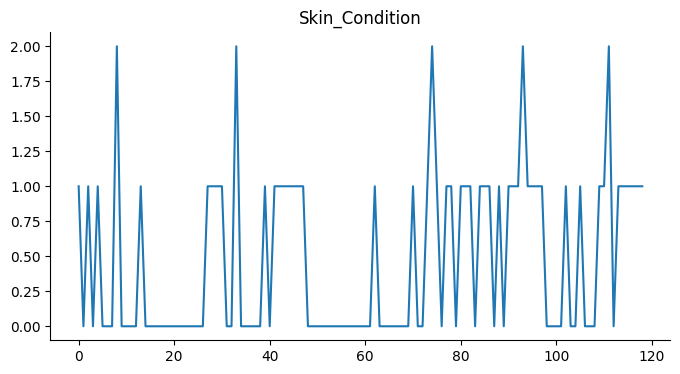

In [94]:
# @title Skin_Condition

from matplotlib import pyplot as plt
data['Skin_Condition'].plot(kind='line', figsize=(8, 4), title='Skin_Condition')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
data['Hepatitis'].value_counts()

Hepatitis
No       52
A        26
B        21
C         9
E         6
D         4
D, No     1
Name: count, dtype: int64

In [83]:
#lets split dataset for predictive modeling
y=data['Hepatitis']
x=data.drop(['Hepatitis'], axis=1)
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (119, 11)
shape of y: (119,)


In [84]:
from sklearn.model_selection import train_test_split

# Assuming 'y' is your target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("The shape of x train:", x_train.shape)
print("The shape of x test:", x_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)

The shape of x train: (95, 11)
The shape of x test: (24, 11)
The shape of y train: (95,)
The shape of y test: (24,)


In [85]:
#lets create a predictive model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'x_train' and 'x_test' are your feature sets
# Assuming 'y_train' and 'y_test' are your target variables

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to a suitable value
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)


In [87]:
from sklearn.metrics import classification_report
#lets print the classification report also
# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           A       0.57      0.80      0.67         5
           B       0.40      0.40      0.40         5
           C       0.00      0.00      0.00         2
           D       0.00      0.00      0.00         0
           E       0.00      0.00      0.00         3
          No       0.73      0.89      0.80         9

    accuracy                           0.58        24
   macro avg       0.28      0.35      0.31        24
weighted avg       0.48      0.58      0.52        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [88]:
prediction = model.predict([[1, 24, 2, 1, 0, 2, 2,0,0,1,1]])
print(prediction)


['D']


In [89]:
data.to_excel('Cleaned_data.excel.xlsx')

In [15]:
from ipywidgets import interact, widgets
from IPython.display import display, HTML
import numpy as np
print('HepatitisAlert:')
# Define your machine learning model and its prediction function
def predict(input_data):
    # Placeholder prediction function, replace this with your actual model prediction logic
    return np.random.choice(['A', 'B', 'C', 'D', 'No'])  # Assuming your model outputs categorical labels


# Mapping between dropdown options and integer values
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
Skin_condition_mapping = {'Yellow': 1, 'Normal': 0, 'Rash': 2}
eyes_condition_mapping = {'Yellow': 1, 'White': 0}
urine_condition_mapping = {'Dark': 1, 'Normal': 0}
joint_pain_mapping = {'No': 0, 'Yes': 1}
fever_mapping = {'Yes': 1, 'No': 0}
stomach_condition_mapping = {'Upset': 1, 'Swollen': 2, 'Normal': 0}
emesis_mapping = {'Nausea': 1, 'Vomiting': 0, 'Normal': 2}
hungry_mapping = {'No': 0, 'Yes': 1, 'Less': 2, 'More': 3}
weakness_mapping = {'No': 0, 'Yes': 1}


# Create interactive widgets for input features
Age = widgets.IntSlider(value=50, min=15, max=100, step=1, description='Age:', style={'description_width': 'initial','color':'red'})
Gender = widgets.Dropdown(options=['Male', 'Female', 'Other'], value='Male', description='Gender:', style={'description_width': 'initial'})
Skin_Condition = widgets.Dropdown(options=['Yellow', 'Normal', 'Rash'], value='Normal', description='Skin Condition:', style={'description_width': 'initial'})
Eyes_Condition = widgets.Dropdown(options=['Yellow', 'White'], value='White', description='Eyes Condition:', style={'description_width': 'initial'})
Urine_Conition = widgets.Dropdown(options=['Dark', 'Normal'], value='Normal', description='Urine Condition:', style={'description_width': 'initial'})
Joint_Pain = widgets.Dropdown(options=['No', 'Yes'], value='No', description='Joint Pain:', style={'description_width': 'initial'})
Fever = widgets.Dropdown(options=['Yes', 'No'], value='No', description='Fever:', style={'description_width': 'initial'})
Stomach_Condition = widgets.Dropdown(options=['Upset', 'Swollen', 'Normal'], value='Normal', description='Stomach Condition:', style={'description_width': 'initial'})
Emesis = widgets.Dropdown(options=['Nausea', 'Vomiting', 'Normal'], value='Normal', description='Emesis:', style={'description_width': 'initial'})
Are_You_Hungry = widgets.Dropdown(options=['No', 'Yes', 'Less', 'More'], value='No', description='Are You Hungry:', style={'description_width': 'initial'})
Weakness = widgets.Dropdown(options=['No', 'Yes'], value='No', description='Weakness:', style={'description_width': 'initial'})

# Define function to handle prediction based on input data
def handle_prediction(age, gender, skin_condition, eyes_condition, urine_condition, joint_pain, fever, stomach_condition, emesis, hungry, weakness):
    # Convert dropdown string values to integer values using mapping
    gender_value = gender_mapping[gender]
    skin_condition_value = Skin_condition_mapping[skin_condition]
    eyes_condition_value = eyes_condition_mapping[eyes_condition]
    urine_condition_value = urine_condition_mapping[urine_condition]
    joint_pain_value = joint_pain_mapping[joint_pain]
    fever_value = fever_mapping[fever]
    stomach_condition_value = stomach_condition_mapping[stomach_condition]
    emesis_value = emesis_mapping[emesis]
    hungry_value = hungry_mapping[hungry]
    weakness_value = weakness_mapping[weakness]



    # Make prediction using the model
    input_data = [age, gender_value, skin_condition_value, eyes_condition_value, urine_condition_value,
                  joint_pain_value, fever_value, stomach_condition_value, emesis_value, hungry_value, weakness_value]
    prediction = predict(input_data)

    # Style the prediction output
    if prediction == 'No':
        output_style = 'background-color: #FFD700; color: black; padding: 8px;'
    else:
        output_style = 'background-color: #32CD32; color: white; padding: 8px;'

        # Display the prediction result with styling
    display(HTML(f'<div style="{output_style}">Predicted Output: {prediction}</div>'))




# Create an interactive interface
interact(handle_prediction, age=Age, gender=Gender, skin_condition=Skin_Condition, eyes_condition=Eyes_Condition,
         urine_condition=Urine_Conition, joint_pain=Joint_Pain, fever=Fever, stomach_condition=Stomach_Condition,
         emesis=Emesis, hungry=Are_You_Hungry, weakness=Weakness)


HepatitisAlert:


interactive(children=(IntSlider(value=50, description='Age:', min=15, style=SliderStyle(description_width='ini…

<function __main__.handle_prediction(age, gender, skin_condition, eyes_condition, urine_condition, joint_pain, fever, stomach_condition, emesis, hungry, weakness)>

In [91]:
import pickle

In [92]:
# Save the data to a file using pickle
with open('HR_Model.pkl', 'wb') as f:
    pickle.dump(data, f)

# Load the data from the file using pickle
with open('HR_Model.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

# Print the loaded data
print(loaded_data)


     Gender  Age  Skin_Condition  Eyes_Condition  Urine_Conition  Joint_Pain  \
0         1   25               1               1               1           0   
1         1   31               0               0               1           0   
2         0   39               1               0               1           1   
3         0   41               0               0               0           1   
4         1   11               1               1               1           1   
..      ...  ...             ...             ...             ...         ...   
114       2   25               1               1               0           1   
115       0   26               1               1               0           1   
116       0   14               1               0               0           0   
117       0    1               1               0               0           1   
118       0    8               1               0               0           0   

     Fever  Stomach_Condition  Emesis  

In [93]:
from sklearn.metrics import accuracy_score

# Assuming y_train and y_test contain the true labels for training and testing data respectively
# Assuming y_pred contains the predicted labels for testing data
# Note: Make sure y_train, y_test, and y_pred have the same length

# Calculate accuracy percentage
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print("Accuracy: {:.2f}%".format(accuracy_percentage))


Accuracy: 58.33%
